In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import set_config
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix
set_config(display='diagram')

# Predicting heart disease

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/heart.csv'
data = pd.read_csv(url)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Column descriptions:**

| column | Description |
| -- | -- |
| `age` | age in years | 
| `sex` | 1 = male; 0 = female| 
| `cp` | chest pain type:  0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic|
| `trestbps` | resting blood pressure (in mm HG on admission to the hostipal) |
| `chol` | serum cholestoral in mg/dl (LDL + HDL + .2 triglycerides) |
| `fbs` | fasting blood sugar > 120 mg/df : 1 = true; 0 = false |
| `restecg` | resting electrocardiographic results: 0 = nothing to note, 1 = ST-T wave abnormality; 2 = possible left ventricular hypertrophy | 
| `thalach` | maximum heart rate achieved |
| `exang` | exercise induced angina (1 = yes; 0 = no) |
| `oldpeak` | ST depression induced by exercise relative to rest | 
| `slope` | the slope of the peak exercise ST segment: 0 = better heart rate with excercise; 1 = typical healthy heart; 2 = signs of uhealthy heart |
| `ca` | number of major vessels (0--3) colored by flourosopy |
| `thal` | thalium stress result: 1--3 = normal; 6 = fixed defect; 7 = reversable defect |
| `target` | have disease or not: 1 = yes; 0 = no) |

**goal** is to **build a classification pipeline** that predicts the `target` column, **tune** the pipeline hyperparameters, and **test** the performance of the pipeline. 

In [3]:
x=data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y=data['target']

In [4]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [7]:
pipe= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy= 'most_frequent')),
    ('encoder',OneHotEncoder()),
    ('poly_features',PolynomialFeatures()),
    ('Knn_clf',KNeighborsClassifier())
])

In [8]:
param_dic ={'poly_features__degree':list(range(1,5)),
           'Knn_clf__weights':['uniform','distance'],
           'Knn_clf__n_neighbors':list(range(1,50))
           }

In [9]:
grid=GridSearchCV(pipe,
                  param_dic,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=-1,verbose=1)

In [10]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 392 candidates, totalling 3920 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('scaler', StandardScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('Knn_clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'Knn_clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...],
                         'Knn_clf__weights': ['uniform', 'distance'],
                         'poly_features__degree': [1, 2, 3, 4]},
             scoring='accuracy', verbose=1)

In [11]:
grid.best_params_

{'Knn_clf__n_neighbors': 14,
 'Knn_clf__weights': 'uniform',
 'poly_features__degree': 1}

In [12]:
grid.best_score_

0.858300395256917

In [13]:
best_pipe=grid.best_estimator_

In [14]:
y_test_pred=best_pipe.predict(x_test)

In [15]:
accuracy_score(y_test,y_test_pred)

0.8157894736842105

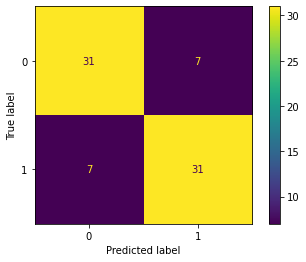

In [16]:
plot_confusion_matrix(best_pipe,x_test,y_test)